In [1]:
import os
from dotenv import find_dotenv, load_dotenv

load_dotenv(find_dotenv())
src_path = os.environ.get('PROJECT_SRC')
os.chdir(src_path)

In [2]:
from data_reader_writer import data_writer
import loads

import pypsa

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## System Transformation - 2045

c:\Users\alyden\Anaconda3\envs\PyPSA-GB\lib\site-packages\pandas\core\arrays\datetimes.py:741: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  warnings.warn(
c:\Users\alyden\Anaconda3\envs\PyPSA-GB\lib\site-packages\pandas\core\indexing.py:1667: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = value
C:\Users\alyden\OneDrive - University of Edinburgh\Python\PyPSA-GB v0.0.1\PyPSA-GB\interconnectors.py:206: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df_FES = df_FES[~df_FES.Variable.str.contains('(TWh)')]


carrier
Waste                     62.176000
Wave power               113.000000
Small Hydro              230.913108
Large Hydro             1691.699577
CCS Gas                 1810.000000
Biomass (dedicated)     1893.542490
Hydrogen                1924.474994
Solar Photovoltaics     3947.294084
Wind Onshore           23890.538179
Wind Offshore          33901.090000
Name: p_nom, dtype: float64
carrier
Liquid Air                       552.993103
Compressed Air                  1104.358621
Pumped Storage Hydroelectric    2012.000000
Battery                         2111.132824
Name: p_nom, dtype: float64
2045-12-07 20:00:00


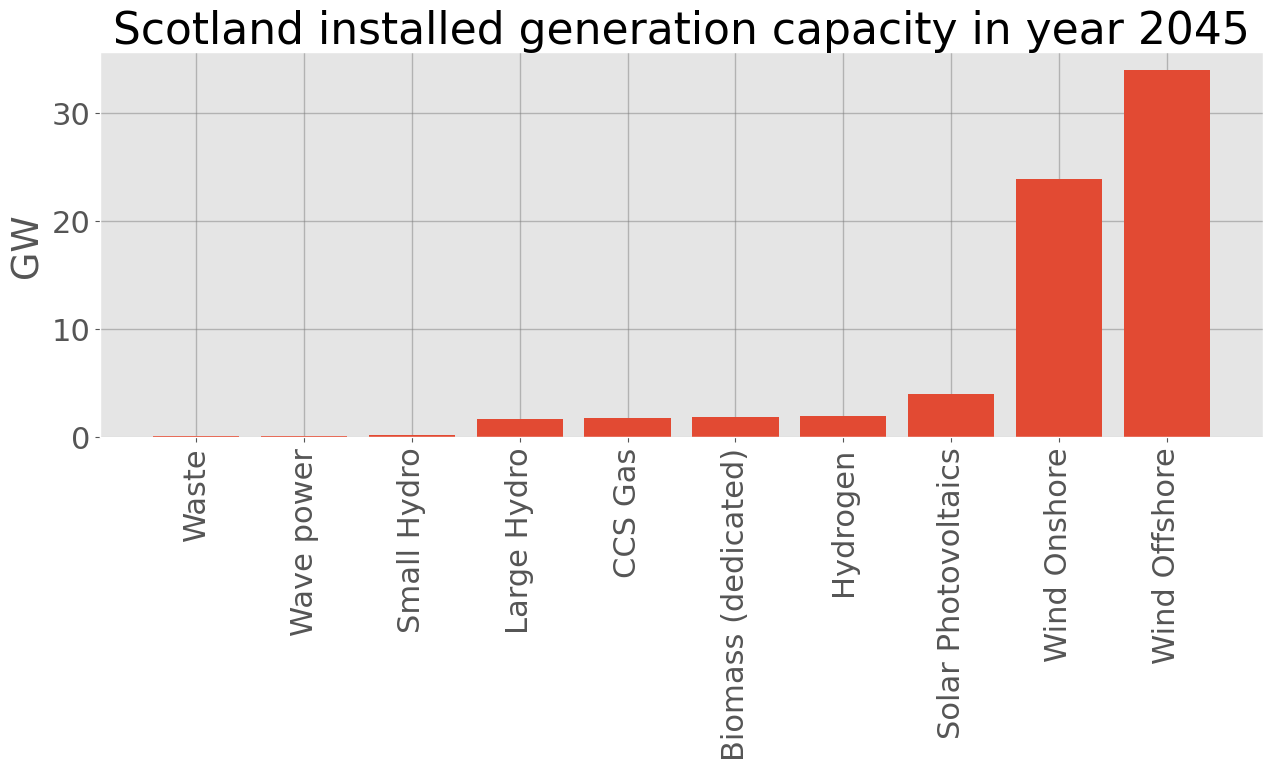

In [3]:
# scenario = 'Leading The Way'
# scenario = 'Consumer Transformation'
scenario = 'System Transformation'
# scenario = 'Steady Progression'
year = 2045
year_baseline = 2012

start = str(year) + '-12-02 00:00:00'
end = str(year) + '-12-02 00:30:00'
# time step as fraction of hour
time_step = 0.5
data_writer(start, end, time_step, year, demand_dataset='eload', year_baseline=year_baseline,
            scenario=scenario, FES=2022, merge_generators=False, scale_to_peak=True)

df_generators = pd.read_csv('LOPF_data/generators.csv', index_col=0)
buses_scotland = ['Beauly', 'Peterhead', 'Errochty', 'Denny/Bonnybridge', 'Neilston', 'Strathaven', 'Torness', 'Eccles']
# select generators in the buses in Scotland
df_generators_scotland = df_generators[df_generators.bus.isin(buses_scotland)]
generators_p_nom_scotland = df_generators_scotland.p_nom.groupby(
    df_generators_scotland.carrier).sum().sort_values()
if year > 2020:
    generators_p_nom_scotland.drop(['Unmet Load', 'CCS Biomass'], inplace=True)
generators_p_nom_scotland.drop(generators_p_nom_scotland[generators_p_nom_scotland < 50].index, inplace=True)
print(generators_p_nom_scotland)
generators_p_nom_scotland_2045 = generators_p_nom_scotland

df_storage = pd.read_csv('LOPF_data/storage_units.csv', index_col=0)
df_storage_scotland = df_storage[df_storage.bus.isin(buses_scotland)]
storage_p_nom_scotland = df_storage_scotland.p_nom.groupby(
    df_storage_scotland.carrier).sum().sort_values()
print(storage_p_nom_scotland)
storage_p_nom_scotland_2045 = storage_p_nom_scotland

demand_dataset = 'eload'
start = str(year) + '-01-01 00:00:00'
end = str(year) + '-12-31 23:30:00' 
loads.write_loads(year)
loads.write_loads_p_set(start, end, year, time_step, demand_dataset, year_baseline=year_baseline, scenario=scenario, FES=2022, scale_to_peak=True)
df_loads = pd.read_csv('LOPF_data/loads-p_set.csv', index_col=0)
peak_load_scotland_2045 = df_loads[buses_scotland].sum(axis=1).max()
print(df_loads[buses_scotland].sum(axis=1).idxmax())

plt.rcParams.update({'font.size': 22})
# bar chart
plt.figure(figsize=(15,5))
plt.bar(generators_p_nom_scotland_2045.index, generators_p_nom_scotland_2045.values / 1000)
plt.xticks(generators_p_nom_scotland_2045.index, rotation=90)
plt.ylabel('GW')
plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)
plt.title('Scotland installed generation capacity in year ' + str(year))
plt.show()

## System Transformation - 2040

c:\Users\alyden\Anaconda3\envs\PyPSA-GB\lib\site-packages\pandas\core\arrays\datetimes.py:741: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  warnings.warn(
c:\Users\alyden\Anaconda3\envs\PyPSA-GB\lib\site-packages\pandas\core\indexing.py:1667: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = value
C:\Users\alyden\OneDrive - University of Edinburgh\Python\PyPSA-GB v0.0.1\PyPSA-GB\interconnectors.py:206: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df_FES = df_FES[~df_FES.Variable.str.contains('(TWh)')]


carrier
Waste                     71.920000
Wave power               113.000000
Small Hydro              228.092963
Natural Gas              259.600000
Hydrogen                 690.020696
CCS Gas                  910.000000
Large Hydro             1671.038879
Biomass (dedicated)     1946.497933
Solar Photovoltaics     3009.816731
Wind Onshore           23325.211626
Wind Offshore          31401.090000
Name: p_nom, dtype: float64
carrier
Liquid Air                       277.131034
Compressed Air                   552.634483
Battery                         1985.332646
Pumped Storage Hydroelectric    2012.000000
Name: p_nom, dtype: float64


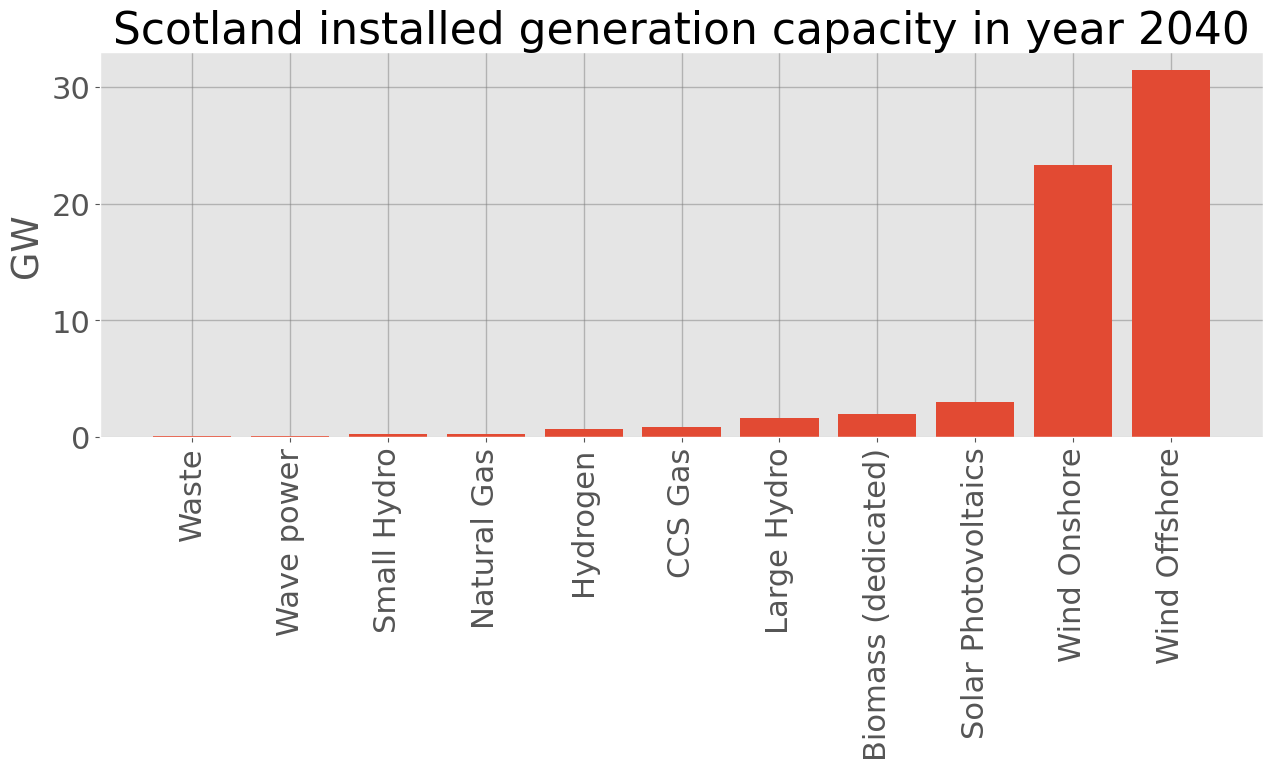

In [4]:
# scenario = 'Leading The Way'
# scenario = 'Consumer Transformation'
scenario = 'System Transformation'
# scenario = 'Steady Progression'
year = 2040
year_baseline = 2012

start = str(year) + '-12-02 00:00:00'
end = str(year) + '-12-02 00:30:00'
# time step as fraction of hour
time_step = 0.5
data_writer(start, end, time_step, year, demand_dataset='eload', year_baseline=year_baseline,
            scenario=scenario, FES=2022, merge_generators=False, scale_to_peak=True)

df_generators = pd.read_csv('LOPF_data/generators.csv', index_col=0)
buses_scotland = ['Beauly', 'Peterhead', 'Errochty', 'Denny/Bonnybridge', 'Neilston', 'Strathaven', 'Torness', 'Eccles']
# select generators in the buses in Scotland
df_generators_scotland = df_generators[df_generators.bus.isin(buses_scotland)]
generators_p_nom_scotland = df_generators_scotland.p_nom.groupby(
    df_generators_scotland.carrier).sum().sort_values()
if year > 2020:
    generators_p_nom_scotland.drop(['Unmet Load', 'CCS Biomass'], inplace=True)
generators_p_nom_scotland.drop(generators_p_nom_scotland[generators_p_nom_scotland < 50].index, inplace=True)
print(generators_p_nom_scotland)
generators_p_nom_scotland_2040 = generators_p_nom_scotland

df_storage = pd.read_csv('LOPF_data/storage_units.csv', index_col=0)
df_storage_scotland = df_storage[df_storage.bus.isin(buses_scotland)]
storage_p_nom_scotland = df_storage_scotland.p_nom.groupby(
    df_storage_scotland.carrier).sum().sort_values()
print(storage_p_nom_scotland)
storage_p_nom_scotland_2040 = storage_p_nom_scotland

demand_dataset = 'eload'
start = str(year) + '-01-01 00:00:00'
end = str(year) + '-12-31 23:30:00' 
loads.write_loads(year)
loads.write_loads_p_set(start, end, year, time_step, demand_dataset, year_baseline=year_baseline, scenario=scenario, FES=2022, scale_to_peak=True)
df_loads = pd.read_csv('LOPF_data/loads-p_set.csv', index_col=0)
peak_load_scotland_2040 = df_loads[buses_scotland].sum(axis=1).max()

plt.rcParams.update({'font.size': 22})
# bar chart
plt.figure(figsize=(15,5))
plt.bar(generators_p_nom_scotland.index, generators_p_nom_scotland.values / 1000)
plt.xticks(generators_p_nom_scotland.index, rotation=90)
plt.ylabel('GW')
plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)
plt.title('Scotland installed generation capacity in year ' + str(year))
plt.show()

## System Transformation - 2035

c:\Users\alyden\Anaconda3\envs\PyPSA-GB\lib\site-packages\pandas\core\arrays\datetimes.py:741: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  warnings.warn(
c:\Users\alyden\Anaconda3\envs\PyPSA-GB\lib\site-packages\pandas\core\indexing.py:1667: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = value
C:\Users\alyden\OneDrive - University of Edinburgh\Python\PyPSA-GB v0.0.1\PyPSA-GB\interconnectors.py:206: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df_FES = df_FES[~df_FES.Variable.str.contains('(TWh)')]


carrier
Waste                     75.168000
Wave power                88.000000
Small Hydro              225.336082
Biomass (dedicated)      230.310799
CCS Gas                  968.584747
Large Hydro             1650.841597
Solar Photovoltaics     2268.839378
Wind Onshore           22452.637137
Wind Offshore          27031.090000
Name: p_nom, dtype: float64
carrier
Compressed Air                     0.910345
Liquid Air                       221.958621
Pumped Storage Hydroelectric     950.000000
Battery                         1936.433019
Name: p_nom, dtype: float64


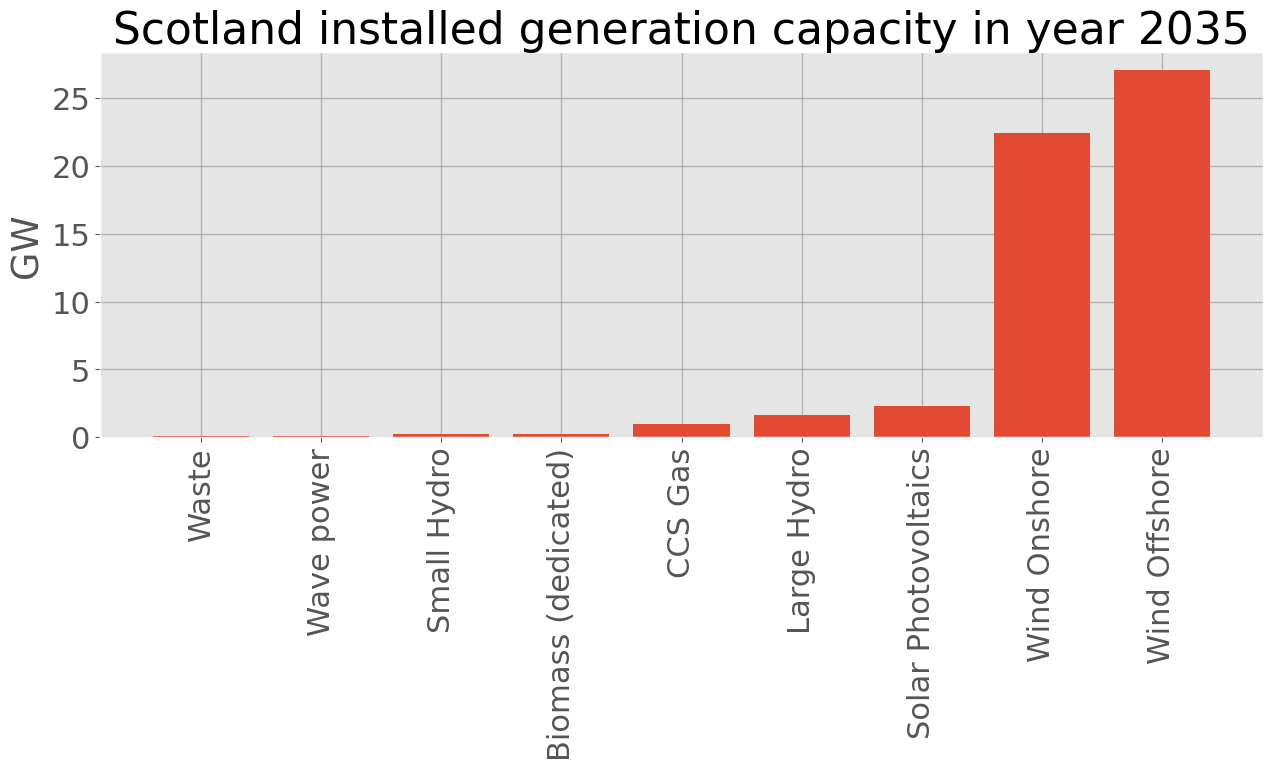

In [5]:
# scenario = 'Leading The Way'
# scenario = 'Consumer Transformation'
scenario = 'System Transformation'
# scenario = 'Steady Progression'
year = 2035
year_baseline = 2012

start = str(year) + '-12-02 00:00:00'
end = str(year) + '-12-02 00:30:00'
# time step as fraction of hour
time_step = 0.5
data_writer(start, end, time_step, year, demand_dataset='eload', year_baseline=year_baseline,
            scenario=scenario, FES=2022, merge_generators=False, scale_to_peak=True)

df_generators = pd.read_csv('LOPF_data/generators.csv', index_col=0)
buses_scotland = ['Beauly', 'Peterhead', 'Errochty', 'Denny/Bonnybridge', 'Neilston', 'Strathaven', 'Torness', 'Eccles']
# select generators in the buses in Scotland
df_generators_scotland = df_generators[df_generators.bus.isin(buses_scotland)]
generators_p_nom_scotland = df_generators_scotland.p_nom.groupby(
    df_generators_scotland.carrier).sum().sort_values()
if year > 2020:
    generators_p_nom_scotland.drop(['Unmet Load', 'CCS Biomass', 'Natural Gas'], inplace=True)
generators_p_nom_scotland.drop(generators_p_nom_scotland[generators_p_nom_scotland < 50].index, inplace=True)
print(generators_p_nom_scotland)
generators_p_nom_scotland_2035 = generators_p_nom_scotland

df_storage = pd.read_csv('LOPF_data/storage_units.csv', index_col=0)
df_storage_scotland = df_storage[df_storage.bus.isin(buses_scotland)]
storage_p_nom_scotland = df_storage_scotland.p_nom.groupby(
    df_storage_scotland.carrier).sum().sort_values()
print(storage_p_nom_scotland)
storage_p_nom_scotland_2035 = storage_p_nom_scotland

demand_dataset = 'eload'
start = str(year) + '-01-01 00:00:00'
end = str(year) + '-12-31 23:30:00' 
loads.write_loads(year)
loads.write_loads_p_set(start, end, year, time_step, demand_dataset, year_baseline=year_baseline, scenario=scenario, FES=2022, scale_to_peak=True)
df_loads = pd.read_csv('LOPF_data/loads-p_set.csv', index_col=0)
peak_load_scotland_2035 = df_loads[buses_scotland].sum(axis=1).max()

plt.rcParams.update({'font.size': 22})
# bar chart
plt.figure(figsize=(15,5))
plt.bar(generators_p_nom_scotland.index, generators_p_nom_scotland.values / 1000)
plt.xticks(generators_p_nom_scotland.index, rotation=90)
plt.ylabel('GW')
plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)
plt.title('Scotland installed generation capacity in year ' + str(year))
plt.show()

## System Transformation - 2030

c:\Users\alyden\Anaconda3\envs\PyPSA-GB\lib\site-packages\pandas\core\arrays\datetimes.py:741: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  warnings.warn(
c:\Users\alyden\Anaconda3\envs\PyPSA-GB\lib\site-packages\pandas\core\indexing.py:1667: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = value
C:\Users\alyden\OneDrive - University of Edinburgh\Python\PyPSA-GB v0.0.1\PyPSA-GB\interconnectors.py:206: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df_FES = df_FES[~df_FES.Variable.str.contains('(TWh)')]


carrier
Oil                       55.200000
Waste                     82.128000
Small Hydro              222.628043
Biomass (dedicated)      250.672326
CCS Gas                  968.584707
Solar Photovoltaics     1400.126320
Large Hydro             1631.002146
Wind Offshore           5136.090000
Wind Onshore           18978.428676
Name: p_nom, dtype: float64
carrier
Compressed Air                     0.910345
Liquid Air                        42.675862
Pumped Storage Hydroelectric     740.000000
Battery                         1771.443400
Name: p_nom, dtype: float64


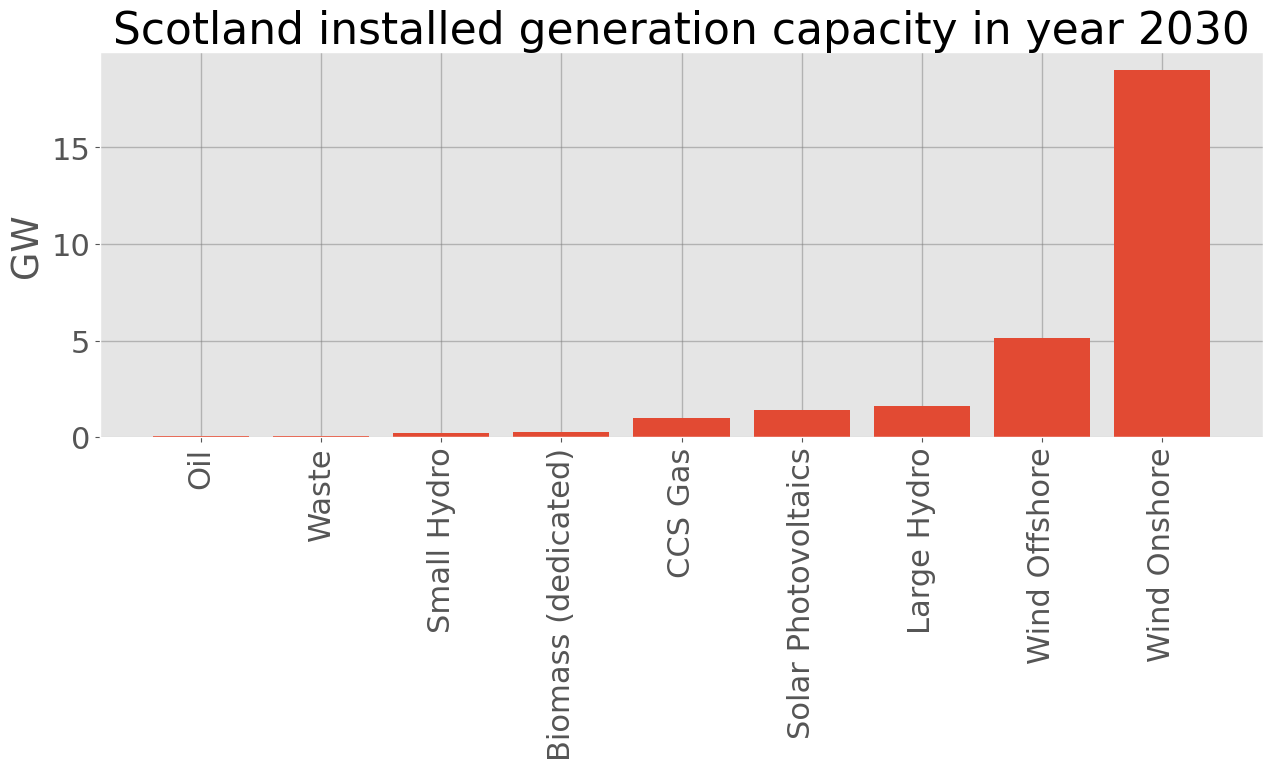

In [6]:
# scenario = 'Leading The Way'
# scenario = 'Consumer Transformation'
scenario = 'System Transformation'
# scenario = 'Steady Progression'
year = 2030
year_baseline = 2012

start = str(year) + '-12-02 00:00:00'
end = str(year) + '-12-02 00:30:00'
# time step as fraction of hour
time_step = 0.5
data_writer(start, end, time_step, year, demand_dataset='eload', year_baseline=year_baseline,
            scenario=scenario, FES=2022, merge_generators=False, scale_to_peak=True)

df_generators = pd.read_csv('LOPF_data/generators.csv', index_col=0)
buses_scotland = ['Beauly', 'Peterhead', 'Errochty', 'Denny/Bonnybridge', 'Neilston', 'Strathaven', 'Torness', 'Eccles']
# select generators in the buses in Scotland
df_generators_scotland = df_generators[df_generators.bus.isin(buses_scotland)]
generators_p_nom_scotland = df_generators_scotland.p_nom.groupby(
    df_generators_scotland.carrier).sum().sort_values()
if year > 2020:
    generators_p_nom_scotland.drop(['Unmet Load', 'CCS Biomass', 'Natural Gas'], inplace=True)
generators_p_nom_scotland.drop(generators_p_nom_scotland[generators_p_nom_scotland < 50].index, inplace=True)
print(generators_p_nom_scotland)
generators_p_nom_scotland_2030 = generators_p_nom_scotland

df_storage = pd.read_csv('LOPF_data/storage_units.csv', index_col=0)
df_storage_scotland = df_storage[df_storage.bus.isin(buses_scotland)]
storage_p_nom_scotland = df_storage_scotland.p_nom.groupby(
    df_storage_scotland.carrier).sum().sort_values()
print(storage_p_nom_scotland)
storage_p_nom_scotland_2030 = storage_p_nom_scotland

demand_dataset = 'eload'
start = str(year) + '-01-01 00:00:00'
end = str(year) + '-12-31 23:30:00' 
loads.write_loads(year)
loads.write_loads_p_set(start, end, year, time_step, demand_dataset, year_baseline=year_baseline, scenario=scenario, FES=2022, scale_to_peak=True)
df_loads = pd.read_csv('LOPF_data/loads-p_set.csv', index_col=0)
peak_load_scotland_2030 = df_loads[buses_scotland].sum(axis=1).max()

plt.rcParams.update({'font.size': 22})
# bar chart
plt.figure(figsize=(15,5))
plt.bar(generators_p_nom_scotland.index, generators_p_nom_scotland.values / 1000)
plt.xticks(generators_p_nom_scotland.index, rotation=90)
plt.ylabel('GW')
plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)
plt.title('Scotland installed generation capacity in year ' + str(year))
plt.show()

## System Transformation - 2021

c:\Users\alyden\Anaconda3\envs\PyPSA-GB\lib\site-packages\pandas\core\arrays\datetimes.py:741: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  warnings.warn(
c:\Users\alyden\Anaconda3\envs\PyPSA-GB\lib\site-packages\pandas\core\indexing.py:1667: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = value


carrier
Waste                    57.536000
Oil                     197.340000
Biomass (dedicated)     207.895993
Small Hydro             217.124238
Solar Photovoltaics     462.292021
Natural Gas            1038.400000
Large Hydro            1590.680533
Wind Offshore          1663.100000
Nuclear                1750.000000
Wind Onshore           8928.762348
Name: p_nom, dtype: float64
carrier
Compressed Air                    0.910345
Liquid Air                        1.379310
Battery                         124.353150
Pumped Storage Hydroelectric    740.000000
Name: p_nom, dtype: float64
4619.702


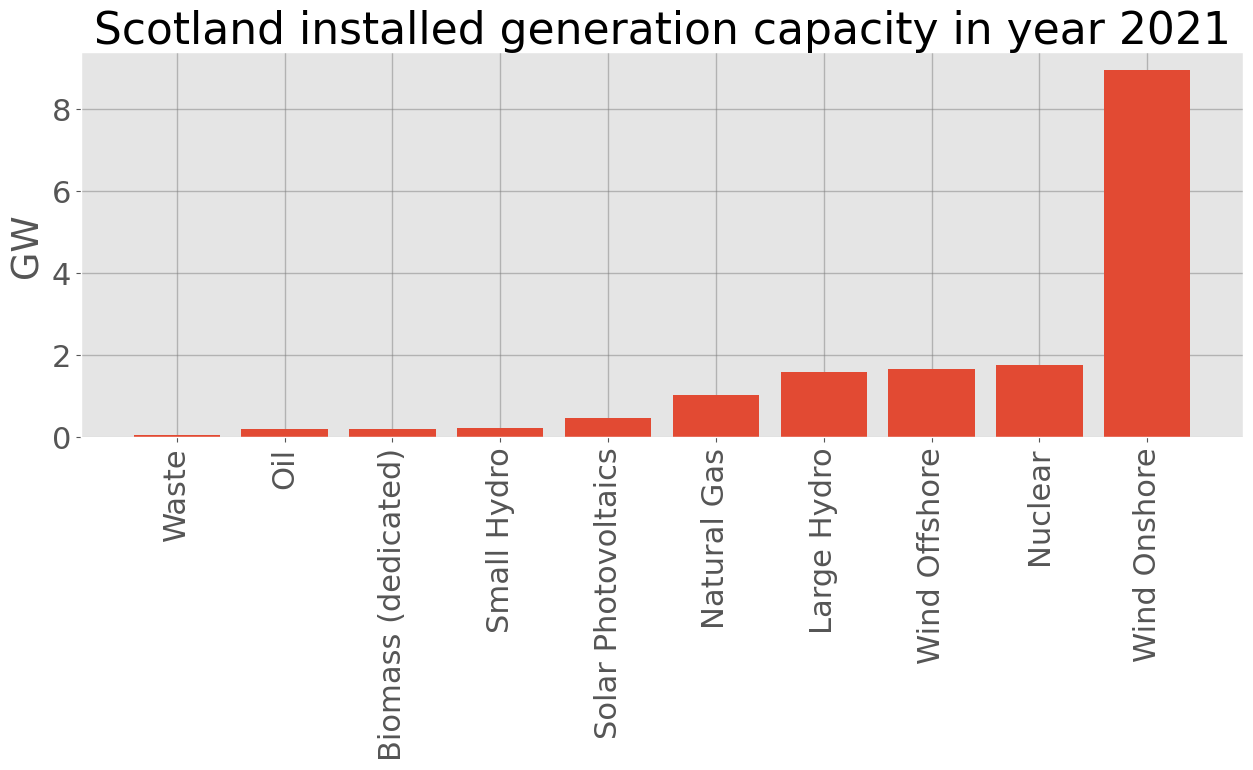

In [7]:
# scenario = 'Leading The Way'
# scenario = 'Consumer Transformation'
scenario = 'System Transformation'
# scenario = 'Steady Progression'
year = 2021
year_baseline = 2012

start = str(year) + '-12-02 00:00:00'
end = str(year) + '-12-02 00:30:00'
# time step as fraction of hour
time_step = 0.5
data_writer(start, end, time_step, year, demand_dataset='eload', year_baseline=year_baseline,
            scenario=scenario, FES=2022, merge_generators=False, scale_to_peak=True)

df_generators = pd.read_csv('LOPF_data/generators.csv', index_col=0)
buses_scotland = ['Beauly', 'Peterhead', 'Errochty', 'Denny/Bonnybridge', 'Neilston', 'Strathaven', 'Torness', 'Eccles']
# select generators in the buses in Scotland
df_generators_scotland = df_generators[df_generators.bus.isin(buses_scotland)]
generators_p_nom_scotland = df_generators_scotland.p_nom.groupby(
    df_generators_scotland.carrier).sum().sort_values()
if year > 2020:
    generators_p_nom_scotland.drop(['Unmet Load', 'CCS Biomass'], inplace=True)
generators_p_nom_scotland.drop(generators_p_nom_scotland[generators_p_nom_scotland < 50].index, inplace=True)
print(generators_p_nom_scotland)
generators_p_nom_scotland_2021 = generators_p_nom_scotland

df_storage = pd.read_csv('LOPF_data/storage_units.csv', index_col=0)
df_storage_scotland = df_storage[df_storage.bus.isin(buses_scotland)]
storage_p_nom_scotland = df_storage_scotland.p_nom.groupby(
    df_storage_scotland.carrier).sum().sort_values()
print(storage_p_nom_scotland)
storage_p_nom_scotland_2021 = storage_p_nom_scotland

demand_dataset = 'eload'
start = str(year) + '-01-01 00:00:00'
end = str(year) + '-12-31 23:30:00' 
loads.write_loads(year)
loads.write_loads_p_set(start, end, year, time_step, demand_dataset, year_baseline=year_baseline, scenario=scenario, FES=2022, scale_to_peak=True)
df_loads = pd.read_csv('LOPF_data/loads-p_set.csv', index_col=0)
peak_load_scotland_2021 = df_loads[buses_scotland].sum(axis=1).max()
print(peak_load_scotland_2021)

plt.rcParams.update({'font.size': 22})
# bar chart
plt.figure(figsize=(15,5))
plt.bar(generators_p_nom_scotland.index, generators_p_nom_scotland.values / 1000)
plt.xticks(generators_p_nom_scotland.index, rotation=90)
plt.ylabel('GW')
plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)
plt.title('Scotland installed generation capacity in year ' + str(year))
plt.show()

                carrier      2021       2030       2035       2040       2045
0                 Waste  0.057536   0.082128   0.075168   0.071920   0.062176
1                   Oil  0.197340   0.055200   0.000000   0.000000   0.000000
2   Biomass (dedicated)  0.207896   0.250672   0.230311   1.946498   1.893542
3   Solar Photovoltaics  0.462292   1.400126   2.268839   3.009817   3.947294
4           Natural Gas  1.038400   0.000000   0.000000   0.259600   0.000000
5                 Hydro  1.807805   1.853630   1.876178   1.899132   1.922613
6         Wind Offshore  1.663100   9.500000  27.031090  31.401090  33.901090
7               Nuclear  1.750000   0.000000   0.000000   0.000000   0.000000
8          Wind Onshore  8.928762  18.978429  22.452637  23.325212  23.890538
9               CCS Gas  0.000000   0.968585   0.968585   0.910000   1.810000
10           Wave power  0.000000   0.000000   0.088000   0.113000   0.113000
11             Hydrogen  0.000000   0.000000   0.000000   0.6900

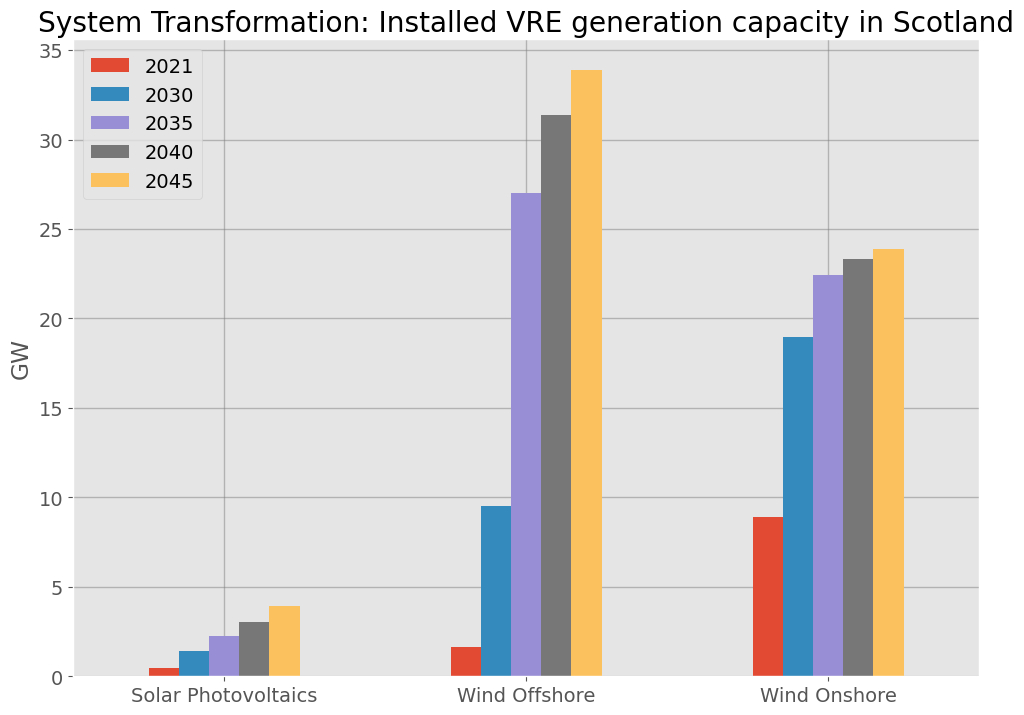

In [8]:
df = pd.concat([generators_p_nom_scotland_2021, generators_p_nom_scotland_2030, generators_p_nom_scotland_2035, generators_p_nom_scotland_2040, generators_p_nom_scotland_2045], axis=1) / 1000
df.loc['Large Hydro'] += df.loc['Small Hydro']
df.drop(['Small Hydro'], inplace=True)

df.columns = [2021, 2030, 2035, 2040, 2045]
df = df.reset_index().fillna(0)
df.iat[5, 0] = 'Hydro'
df.iat[6, 2] = 9.5
print(df)
df_vres = df.iloc[[3, 6, 8]]
plt.rcParams.update({'font.size': 14})
df_vres.plot(x="carrier", y=[2021, 2030, 2035, 2040, 2045], kind="bar", rot=0, figsize=(11.69, 8.27))
plt.title('System Transformation: Installed VRE generation capacity in Scotland')
plt.ylabel('GW')
plt.xlabel('')
plt.legend(loc='upper left')
# plt.bar(generators_p_nom_scotland.index, generators_p_nom_scotland.values / 1000)
# plt.xticks(generators_p_nom_scotland.index, rotation=90)
plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)

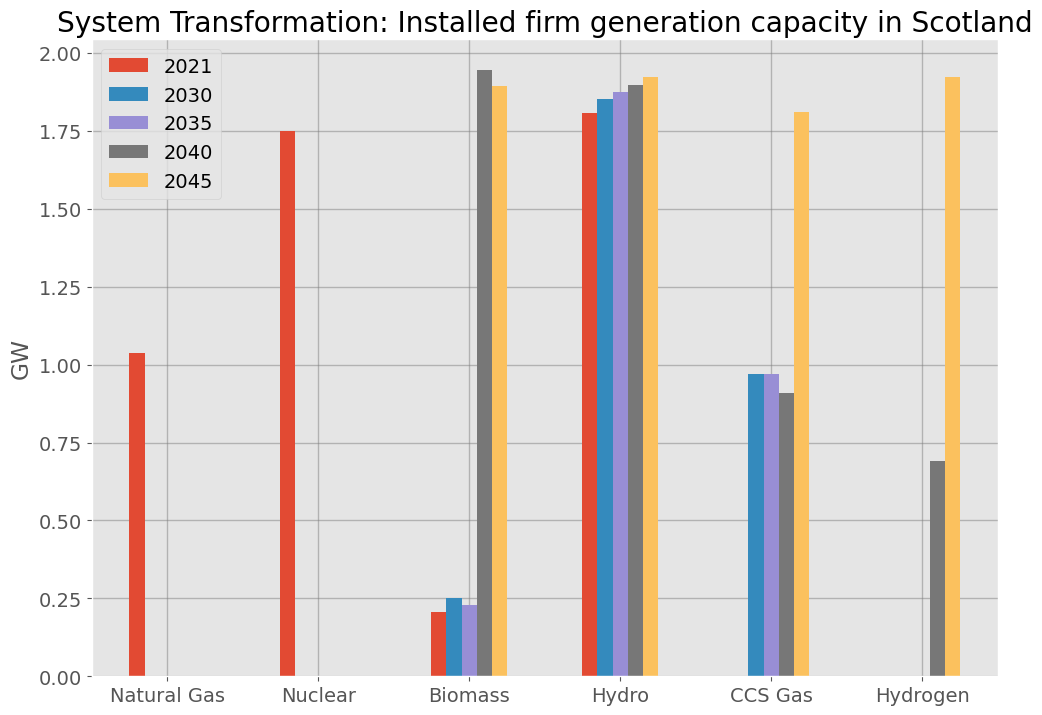

In [9]:
df_firm = df.iloc[[4, 7, 2, 5, 9, 11]]
# bug in natural gas gen appearing in 2040
df_firm.at[4, 2040] = 0.
df_firm.at[2, 'carrier'] = 'Biomass'
df_firm.plot(x="carrier", y=[2021, 2030, 2035, 2040, 2045], kind="bar", rot=0, figsize=(11.69, 8.27))
plt.title('System Transformation: Installed firm generation capacity in Scotland')
plt.ylabel('GW')
plt.xlabel('')
plt.legend(loc='upper left')
# plt.bar(generators_p_nom_scotland.index, generators_p_nom_scotland.values / 1000)
# plt.xticks(generators_p_nom_scotland.index, rotation=90)

plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)

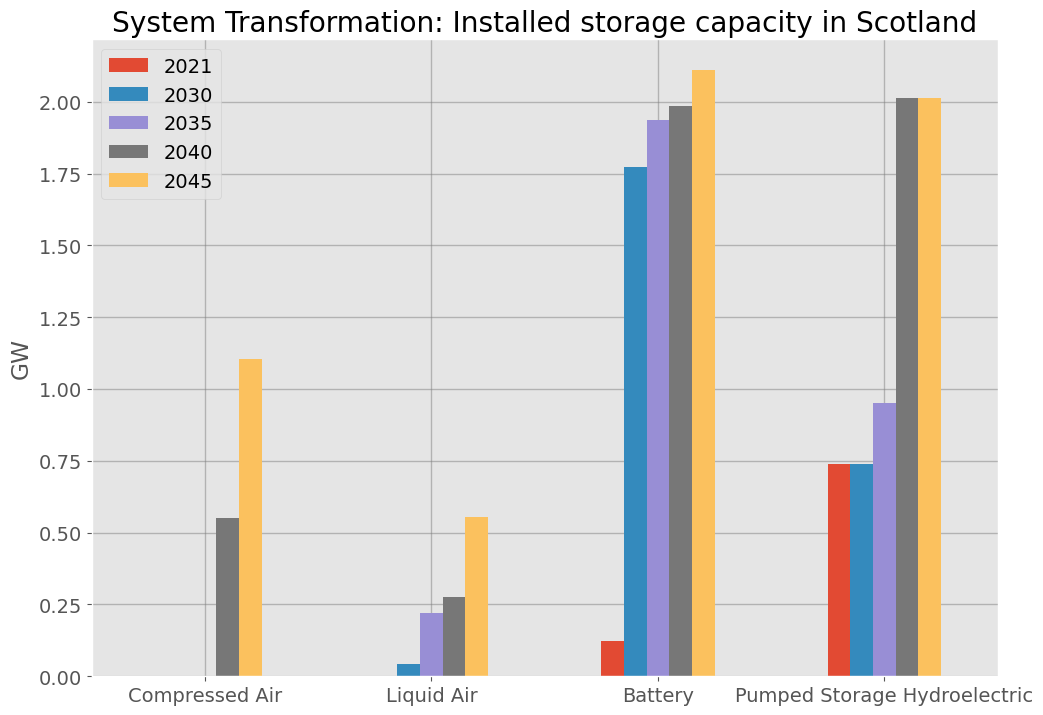

In [10]:
df_s = pd.concat([storage_p_nom_scotland_2021, storage_p_nom_scotland_2030, storage_p_nom_scotland_2035, storage_p_nom_scotland_2040, storage_p_nom_scotland_2045], axis=1) / 1000
df_s.columns = [2021, 2030, 2035, 2040, 2045]
df_s = df_s.reset_index().fillna(0)
df_s.plot(x="carrier", y=[2021, 2030, 2035, 2040, 2045], kind="bar", rot=0, figsize=(11.69, 8.27))
plt.title('System Transformation: Installed storage capacity in Scotland')
plt.ylabel('GW')
plt.xlabel('')
plt.legend(loc='upper left')
# plt.bar(generators_p_nom_scotland.index, generators_p_nom_scotland.values / 1000)
# plt.xticks(generators_p_nom_scotland.index, rotation=90)

plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)

      Peak Demand
2021     4.619702
2030     5.172036
2035     6.000924
2040     7.455238
2045     8.729542


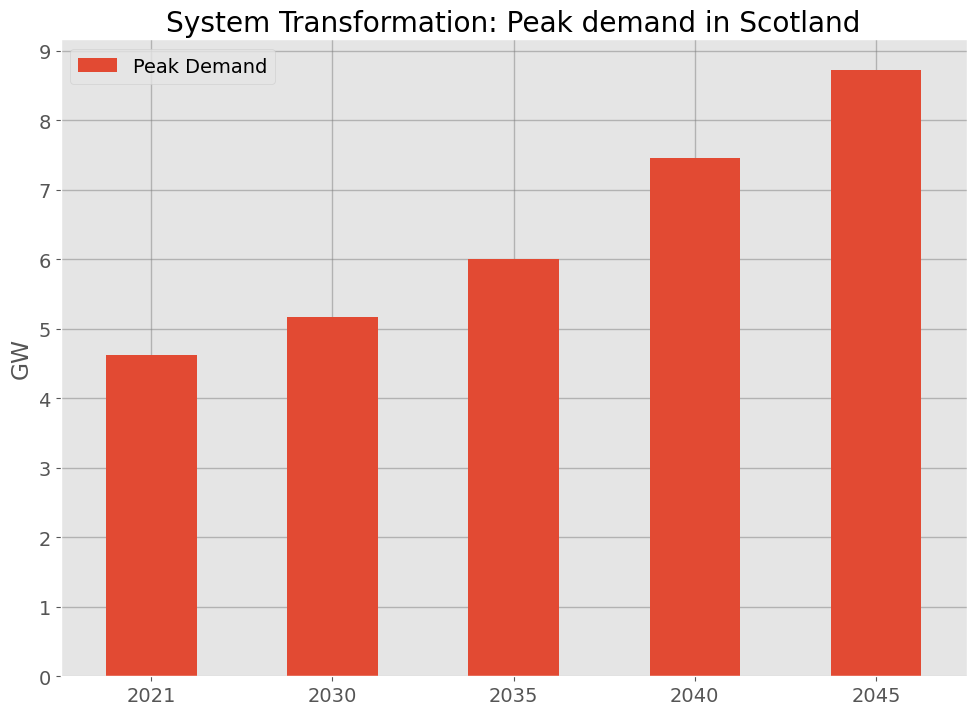

In [11]:
df_l = pd.DataFrame([peak_load_scotland_2021, peak_load_scotland_2030, peak_load_scotland_2035, peak_load_scotland_2040, peak_load_scotland_2045], columns=['Peak Demand']) / 1000
df_l.index = [2021, 2030, 2035, 2040, 2045]
# df_l = df_l.reset_index().fillna(0)
print(df_l)
df_l.plot(kind="bar", rot=0, figsize=(11.69, 8.27))
plt.title('System Transformation: Peak demand in Scotland')
plt.ylabel('GW')
plt.yticks(np.arange(0, 10, 1.0))
# plt.xlabel('')
# plt.legend(loc='upper left')
# # plt.bar(generators_p_nom_scotland.index, generators_p_nom_scotland.values / 1000)
# # plt.xticks(generators_p_nom_scotland.index, rotation=90)

plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)